Enter the tickers of stocks you want to analyze (separated by commas): RELIANCE.NS,ITC.NS,BAJAJFINSV.NS,TCS.NS,INDUSINDBK.NS,TATASTEEL.NS,WIPRO.NS,COALINDIA.NS,TITAN.NS,APOLLOHOSP.NS,ULTRACEMCO.NS,HEROMOTOCO.NS,LTIM.NS,HINDALCO.NS,ONGC.NS,TATACONSUM.NS,CIPLA.NS,MARUTI.NS,NTPC.NS,BAJFINANCE.NS,KOTAKBANK.NS,BHARTIARTL.NS,NESTLEIND.NS,M&M.NS,SHRIRAMFIN.NS,^NSEI


[*********************100%%**********************]  26 of 26 completed


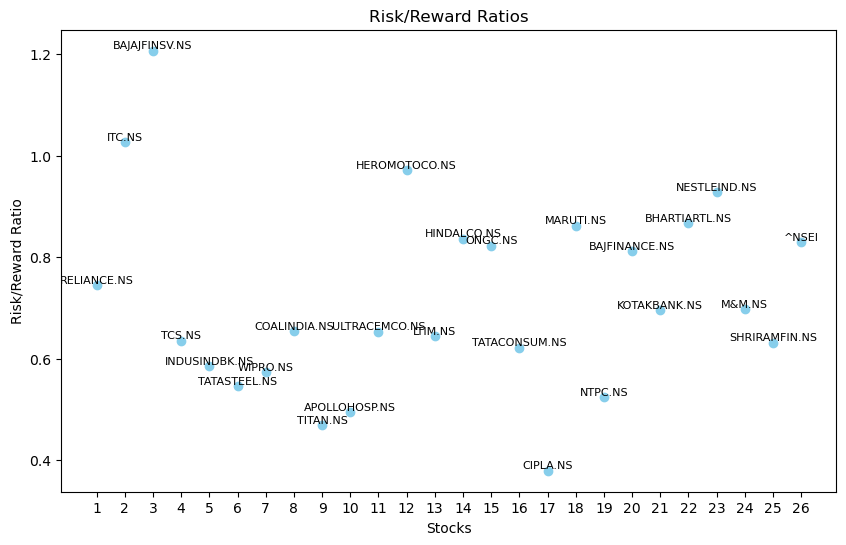

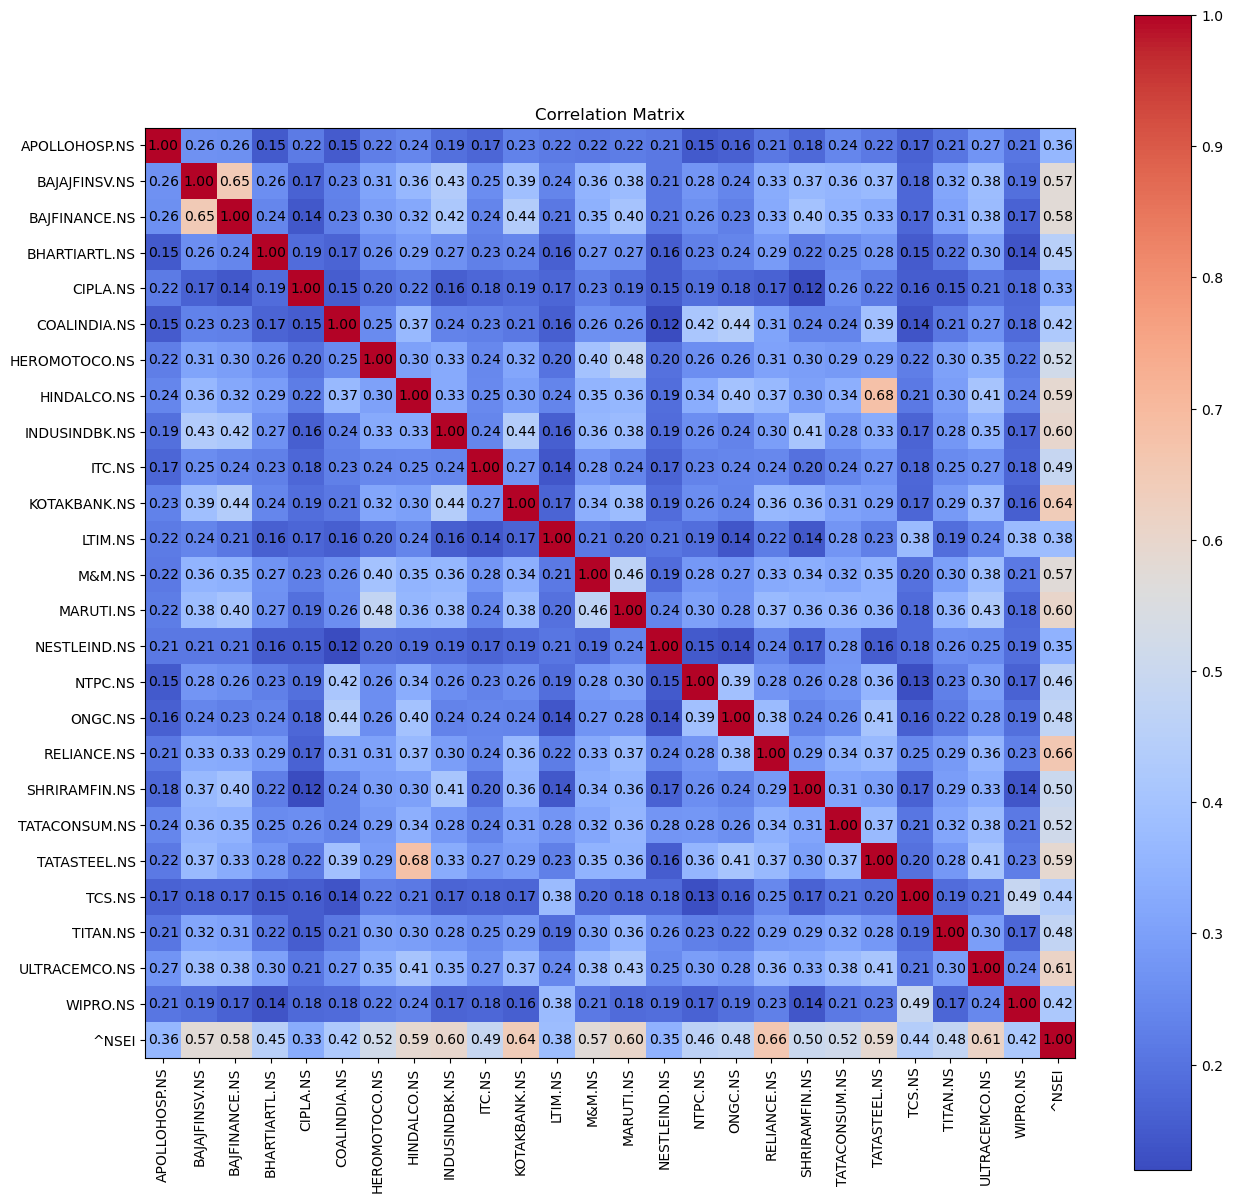

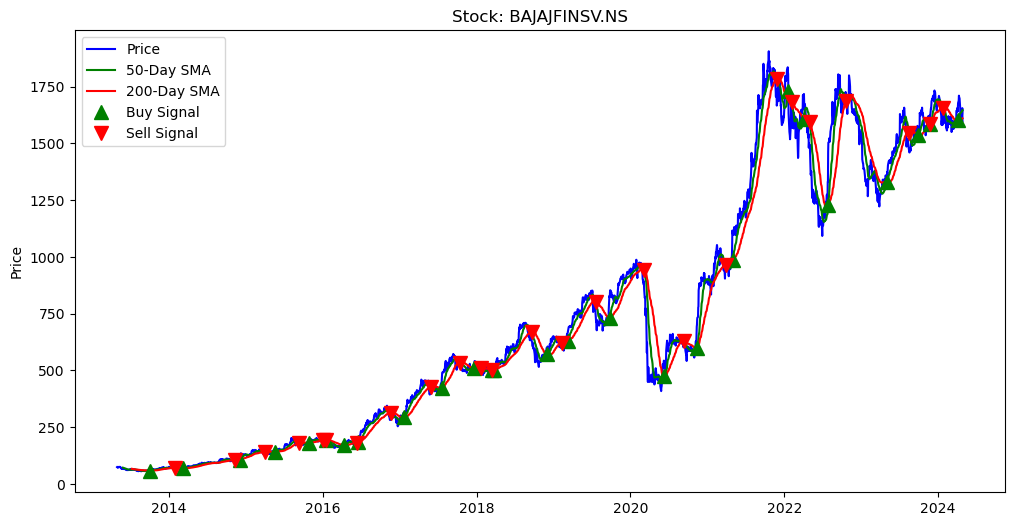

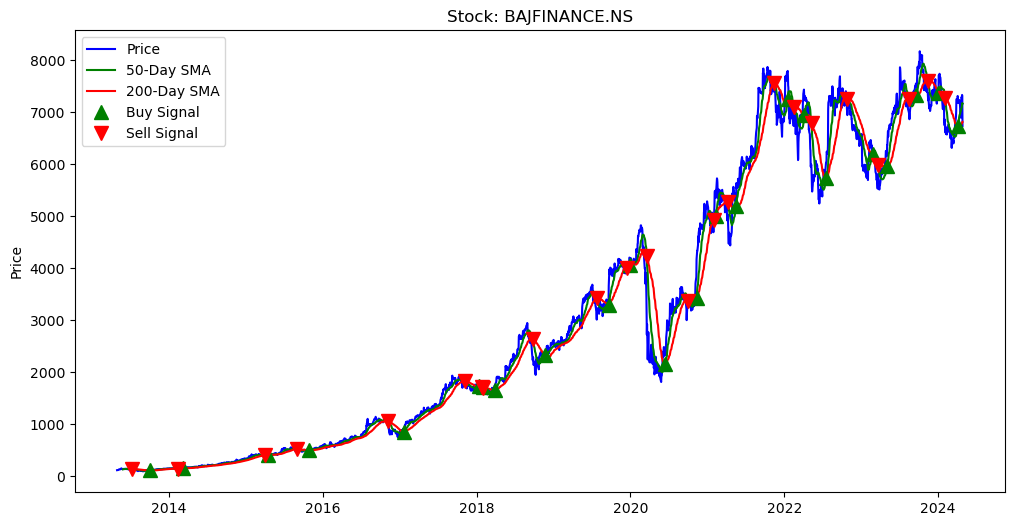

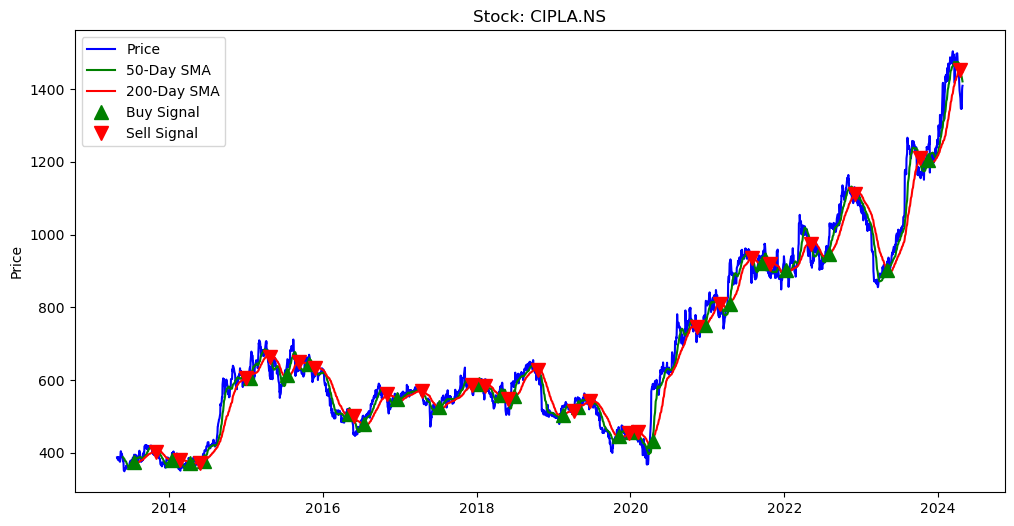

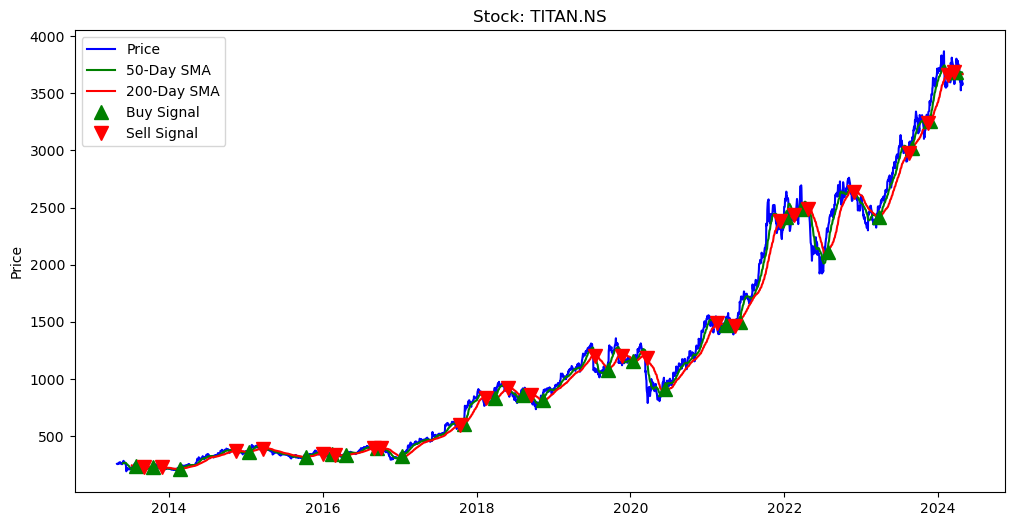

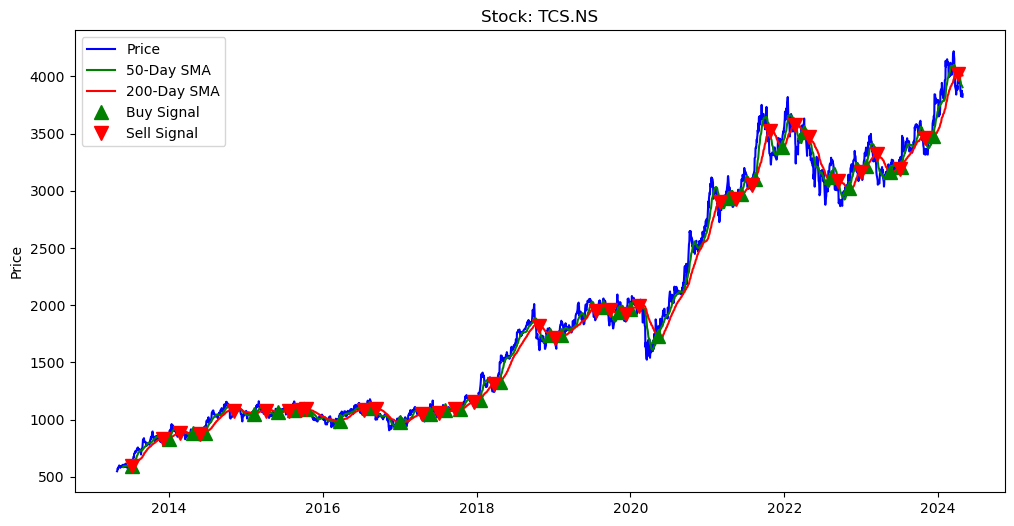

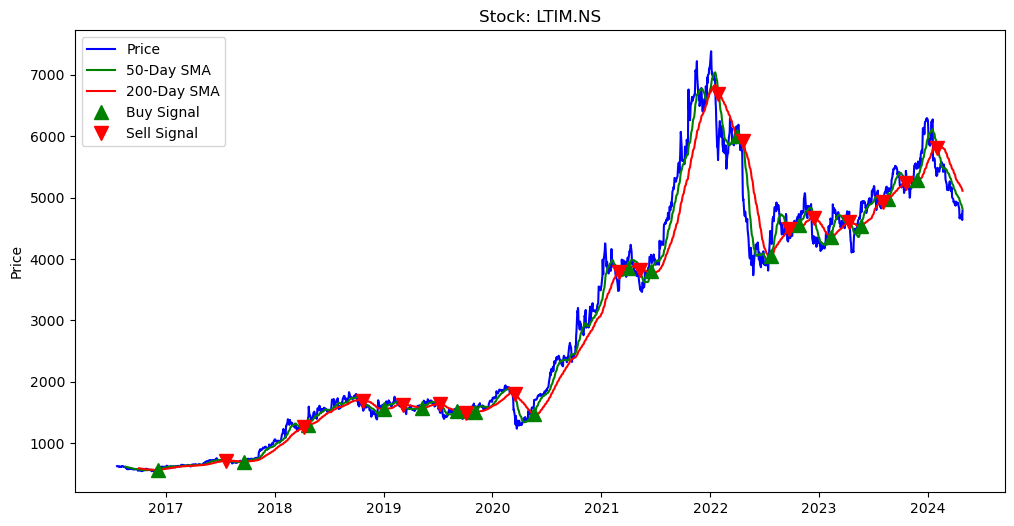

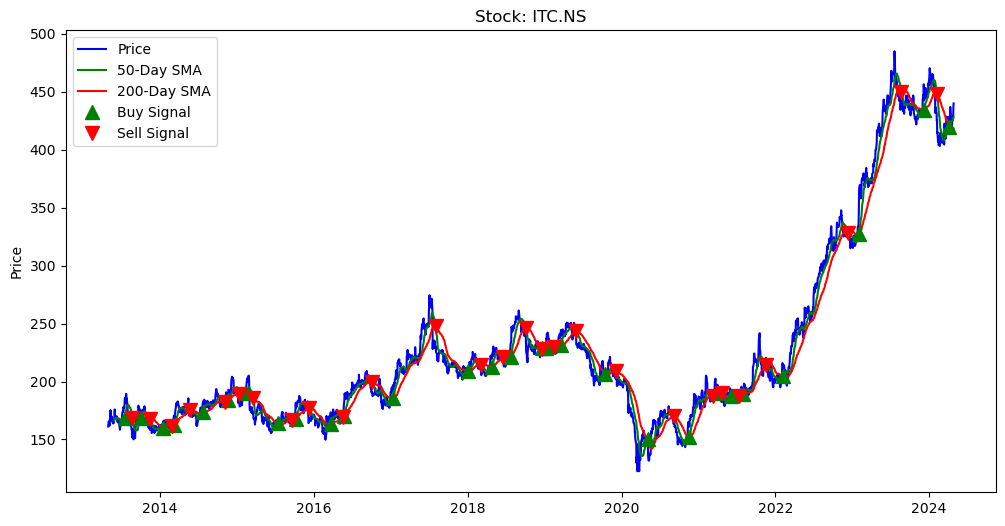

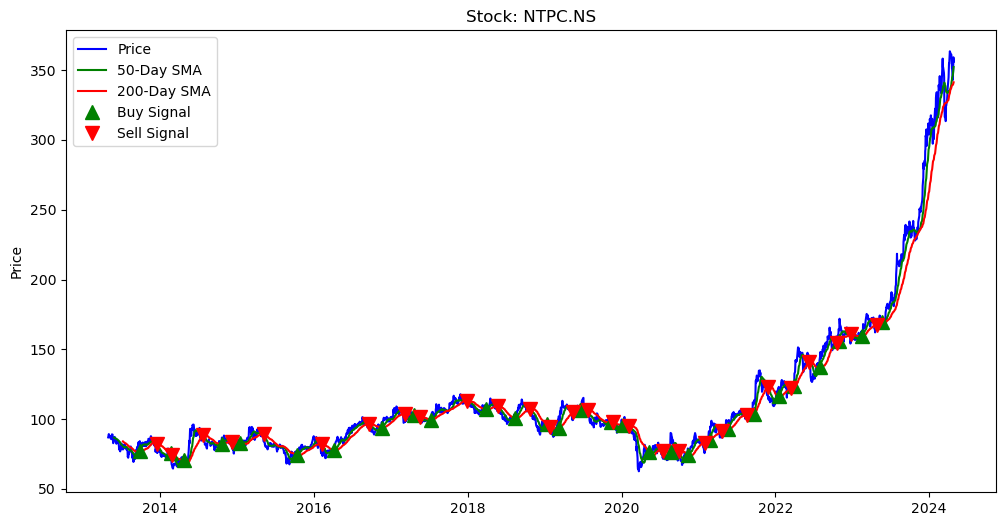

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

def calculate_returns(data):
    returns = data.pct_change()
    return returns

def calculate_risk_reward_ratio(returns):
    mean_return = returns.mean()*252
    std_return = returns.std()*np.sqrt(252)
    risk_reward_ratio = mean_return / std_return
    return risk_reward_ratio

def calculate_correlation(returns):
    correlation_matrix = returns.corr()
    return correlation_matrix

def find_best_pairs(risk_reward_ratios, correlation_matrix):
    # Find top 5 stocks with highest risk/reward ratios
    top_5_stocks = risk_reward_ratios.nlargest(5).index.tolist()
    best_pairs = {}
    # Find least correlated stock for each of the top 5 stocks
    for stock in top_5_stocks:
        least_correlated_stock = correlation_matrix[stock].idxmin()
        best_pairs[stock] = least_correlated_stock
    return best_pairs

def calculate_moving_averages(data):
    short_rolling = data.rolling(window=20).mean()
    medium_rolling = data.rolling(window=50).mean()
    long_rolling = data.rolling(window=200).mean()
    return short_rolling, medium_rolling, long_rolling

def plot_data(data, medium_rolling, long_rolling, ticker):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(data, label='Price', color='blue')
    ax1.plot(medium_rolling, label='50-Day SMA', color='green')
    ax1.plot(long_rolling, label='200-Day SMA', color='red')
    ax1.set_ylabel('Price')
    
    ax1.set_title(f'Stock: {ticker}')  # Set the title with the stock ticker symbol

    # Add buy and sell signals based on moving average crossovers
    buy_signal = (medium_rolling > long_rolling) & (medium_rolling.shift(1) < long_rolling.shift(1))
    sell_signal = (medium_rolling < long_rolling) & (medium_rolling.shift(1) > long_rolling.shift(1))
    ax1.plot(medium_rolling.index[buy_signal], medium_rolling[buy_signal], '^', markersize=10, color='g', lw=0, label='Buy Signal')
    ax1.plot(medium_rolling.index[sell_signal], medium_rolling[sell_signal], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
    
    # Manually create legend for buy and sell signals
    ax1.legend(loc='upper left')
    
    plt.show()


def plot_correlation(correlation_matrix):
    plt.figure(figsize=(15, 15))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    tickers = correlation_matrix.columns.tolist()
    plt.xticks(range(len(tickers)), tickers, rotation=90)
    plt.yticks(range(len(tickers)), tickers)
    plt.title('Correlation Matrix')
    for i in range(len(tickers)):
        for j in range(len(tickers)):
            plt.text(j, i, "{:.2f}".format(correlation_matrix.values[i, j]), ha='center', va='center', color='black')
    plt.show()


def plot_risk_reward(risk_reward_ratios, tickers):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(risk_reward_ratios)), risk_reward_ratios, color='skyblue')
    plt.title('Risk/Reward Ratios')
    plt.xlabel('Stocks')
    plt.ylabel('Risk/Reward Ratio')
    plt.xticks(range(len(risk_reward_ratios)), range(1, len(risk_reward_ratios) + 1))
    
    # Add labels for each data point
    for i, ratio in enumerate(risk_reward_ratios):
        plt.text(i, ratio, f'{tickers[i]}', ha='center', va='bottom', fontsize=8)
    
    plt.show()


def main():
    tickers = input("Enter the tickers of stocks you want to analyze (separated by commas): ").split(',')   
    start_date = '2013-04-29'
    end_date = '2024-04-29'
    
    # Fetch data
    data = fetch_data(tickers, start_date, end_date)
    
    # Calculate returns
    returns = calculate_returns(data)
    
    # Calculate risk/reward ratios
    risk_reward_ratios = calculate_risk_reward_ratio(returns)
    
    # Plot risk/reward ratios
    plot_risk_reward(risk_reward_ratios, tickers)
    
    # Calculate correlation matrix
    correlation_matrix = calculate_correlation(returns)
    
    # Plot correlation matrix
    plot_correlation(correlation_matrix)
    
    # Find best pairs
    best_pairs = find_best_pairs(risk_reward_ratios, correlation_matrix)
    
    all_stocks = set(best_pairs.keys())
    for stock, least_correlated_stock in best_pairs.items():
        all_stocks.add(least_correlated_stock)
    
    # Calculate and plot moving averages for all stocks in the set
    for ticker in all_stocks:
        short_rolling, medium_rolling, long_rolling = calculate_moving_averages(data[ticker])
        plot_data(data[ticker], short_rolling, medium_rolling, ticker)


if __name__ == "__main__":
    main()
